In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("E:/Uninversity/Semester 4/PAI Lab/spaceship-titanic/train.csv")
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data = pd.read_csv("E:/Uninversity/Semester 4/PAI Lab/spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print(train_data.isna().sum())
print("")
print(test_data.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [6]:
numeric_data_train = train_data.select_dtypes(include=['float64', 'int64'])
numeric_data_test = test_data.select_dtypes(include=['float64', 'int64'])

In [7]:
for column in numeric_data_train.columns:
    train_data[column] = train_data[column].fillna(value=0)

for column in numeric_data_test.columns:
    test_data[column] = test_data[column].fillna(value=0)

In [8]:
train_data["CryoSleep"] = train_data["CryoSleep"].fillna(0).astype(int)
train_data["VIP"] = train_data["VIP"].fillna(0).astype(int)
train_data["Transported"] = train_data["Transported"].fillna(0).astype(int)

test_data["CryoSleep"] = test_data["CryoSleep"].fillna(0).astype(int)
test_data["VIP"] = test_data["VIP"].fillna(0).astype(int)

In [9]:
train_data["Destination"] = train_data["Destination"].fillna(train_data["Destination"].mode()[0])
test_data["Destination"] = test_data["Destination"].fillna(test_data["Destination"].mode()[0])

train_data["HomePlanet"] = train_data["HomePlanet"].fillna(train_data["HomePlanet"].mode()[0])
test_data["HomePlanet"] = test_data["HomePlanet"].fillna(test_data["HomePlanet"].mode()[0])

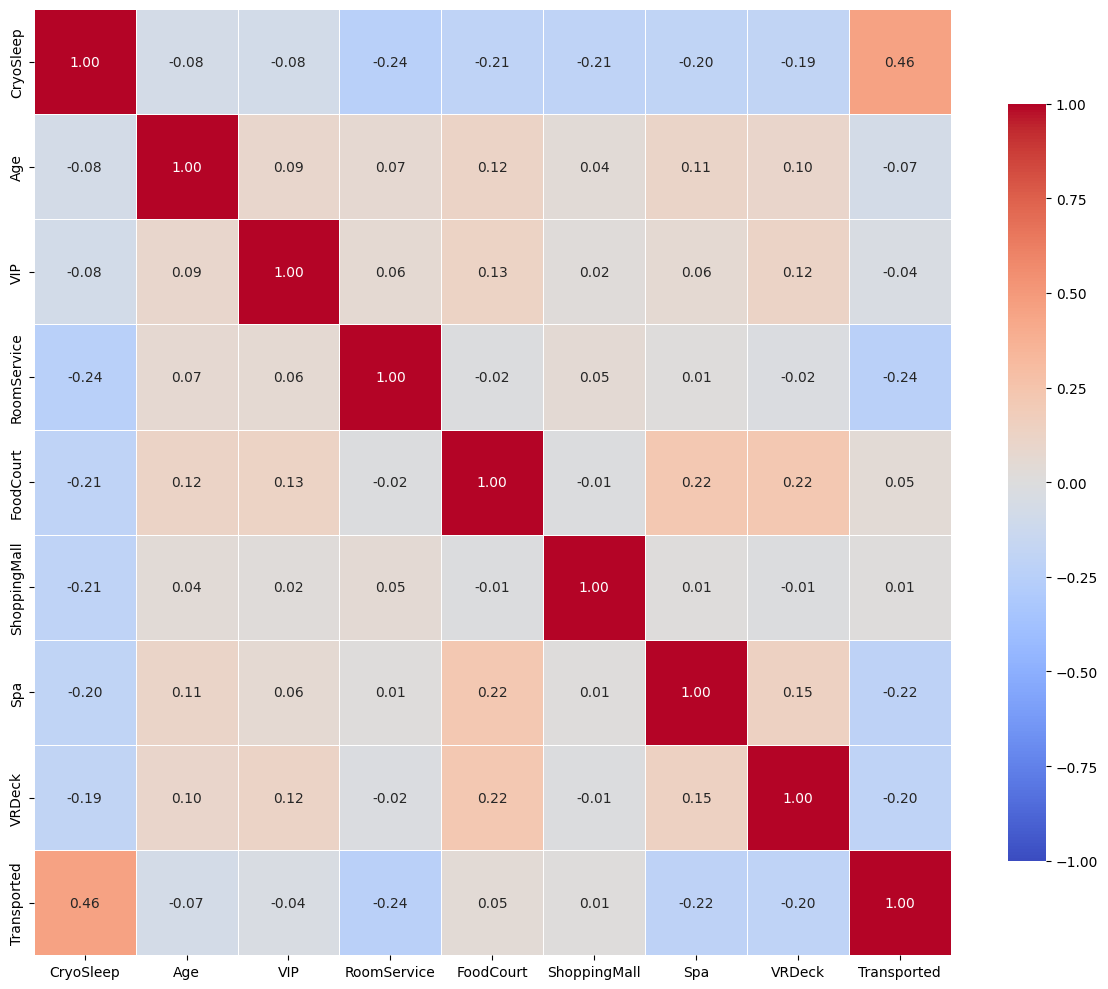

In [10]:
numeric_data_train = train_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data_train.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})
plt.tight_layout()
plt.show()

In [11]:
y = train_data["Transported"]

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())

model.fit(X, y)
predictions = model.predict(X_test)

[0.77170788 0.76825762 0.76078206 0.78596087 0.78826237]
0.7749941602352053


In [13]:
print(scores.mean())

0.7749941602352053


In [14]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
